<IPython.core.display.Javascript object>


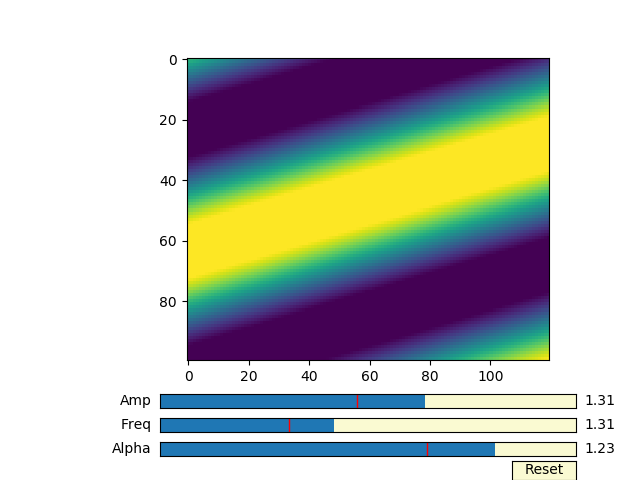

In [2]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.animation as animation

fig1, ax = plt.subplots()


def f(x, y,a,v,al):
    return a*(np.sin(x*v*np.cos(al)+y*v*np.sin(al)))
    #return a*(np.sin(x*v) + np.cos(y*v))

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

a=1;
v=1;
al=np.pi/2;
#img.append([plt.imshow(f(x, y,a,v))])
l = plt.imshow(f(x, y,a,v,al), animated=True)
def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    l.set_array(f(x, y,a,v,al))
    return l,

plt.subplots_adjust(left=0.25, bottom=0.25)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axal = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 3.0, valinit=1)
samp = Slider(axamp, 'Amp', 0.1, 2.0, valinit=1)
sal = Slider(axal, 'Alpha', 0.1, 1.5, valinit=1)


def update(val):
    global a,v,al
    a = samp.val
    v = sfreq.val
    al = sal.val
    l.set_data(f(x,y,a,v,al))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)
sal.on_changed(update)

resetax = plt.axes([0.8, 0.0, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

ani = animation.FuncAnimation(fig1, updatefig, interval=50, blit=True)
plt.show()
